# Digit recognition 

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm

## Model
### <u>Question 4.1 </u>

In [20]:
print('We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 =',(784+1)*32+(32+1)*32+(32+1)*10,' optimization variables ')

We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 = 26506  optimization variables 


5


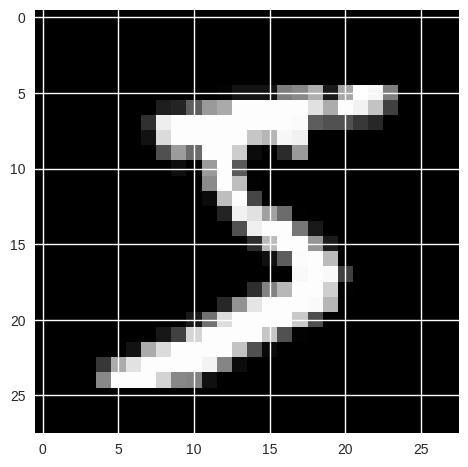

In [21]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [22]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss1(true, pred):
    val = 0.
    for i in range(len(true)):
        delta = pred[i, true[i]]
        val -= np.log(delta)
    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [23]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([2, 2, 9, 9, 9, 8, 9, 8, 9, 1, 2, 2, 2, 9, 9, 2, 2, 2, 8, 2, 2, 9,
       9, 2, 2, 2, 9, 2, 2, 9, 2, 2, 9, 1, 9, 2, 2, 2, 2, 9, 2, 2, 6, 2,
       6, 9, 2, 2, 2, 2, 2, 2, 6, 2, 2, 9, 2, 8, 2, 2, 6, 9, 9, 9, 2, 2,
       9, 2, 2, 2, 2, 9, 2, 9, 9, 2, 2, 2, 2, 9, 2, 8, 2, 9, 6, 2, 9, 2,
       6, 9, 2, 2, 6, 2, 9, 2, 9, 2, 2, 2])

In [24]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

## Stochastic gradient descent

### <u>Question 5.1 </u>

### Implement stochastic gradient descent

In [25]:
## Updating weights

def update_weights(model, update, gamma):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - gamma * update[i]
    model.set_weights(new_weights)   


def stochastic_gradient_descent(x_train,y_train, loss_):
    number = len(x_train)//8   # K: Number of iteration over the data 
    step = 1/np.sqrt(number)   # Constant step 

    for k in tqdm(range (number)):

        x_train_batch = x_train[8*k:8*k+8]
        y_train_batch = y_train[8*k:8*k+8]
        with tf.GradientTape() as tape:
                # Run the forward pass of the layer.
                # The operations that the layer applies
                # to its inputs are going to be recorded
                # on the GradientTape.
                logits = model(x_train_batch)  # Logits for this minibatch

                # Compute the loss value for this minibatch.
                loss_value = loss(y_train_batch, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grad = tape.gradient(loss_value, model.trainable_weights)
        update_weights(model, grad, step)
        ## Evaluate model
        samples_for_evaluation = np.random.randint(0, 10000, 1000)
        logits = model(x_train[samples_for_evaluation])
        loss_.append(loss(y_train[samples_for_evaluation], logits).numpy())
        
    return(loss_)


In [8]:
loss_=[]
loss_= stochastic_gradient_descent(x_train,y_train, loss_)

100%|██████████████████████████████████████| 7500/7500 [00:56<00:00, 132.00it/s]


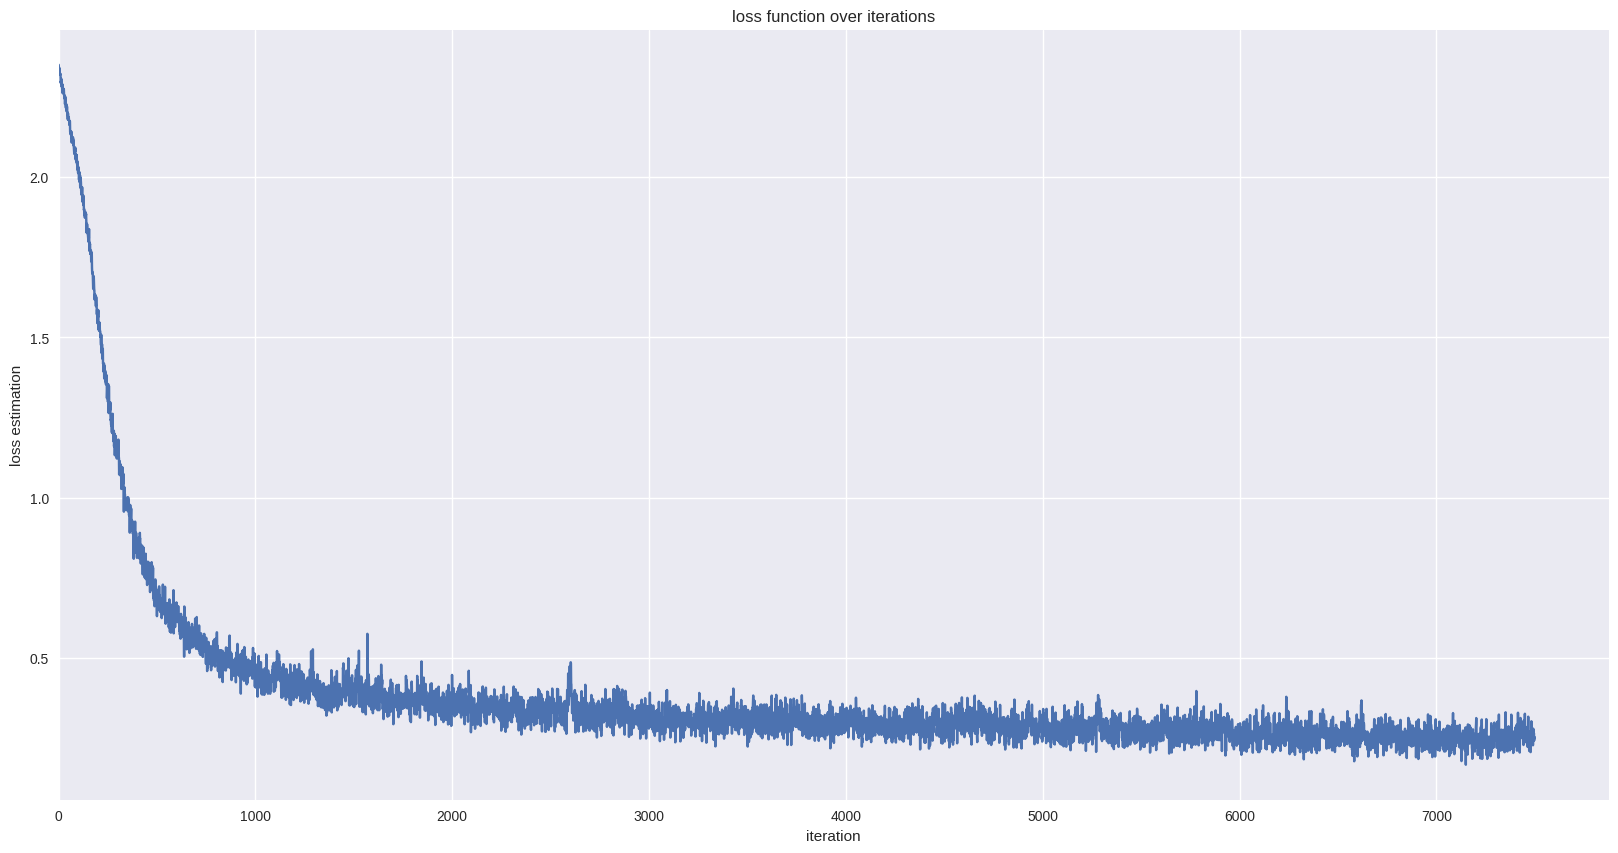

In [9]:
plt.figure(1,figsize=(20,10))
plt.plot(np.arange(len(loss_)),loss_,)
plt.title('loss function over iterations')
plt.xlabel('iteration')
plt.xlim(0, None)
plt.ylabel('loss estimation')
plt.show()

## Empirical risk minimization

### <u>Question 6.1 </u>

In [26]:
loss_2=[]
for k in range (10):
    loss_=stochastic_gradient_descent(x_train,y_train, loss_2)

100%|██████████████████████████████████████| 7500/7500 [01:03<00:00, 117.96it/s]


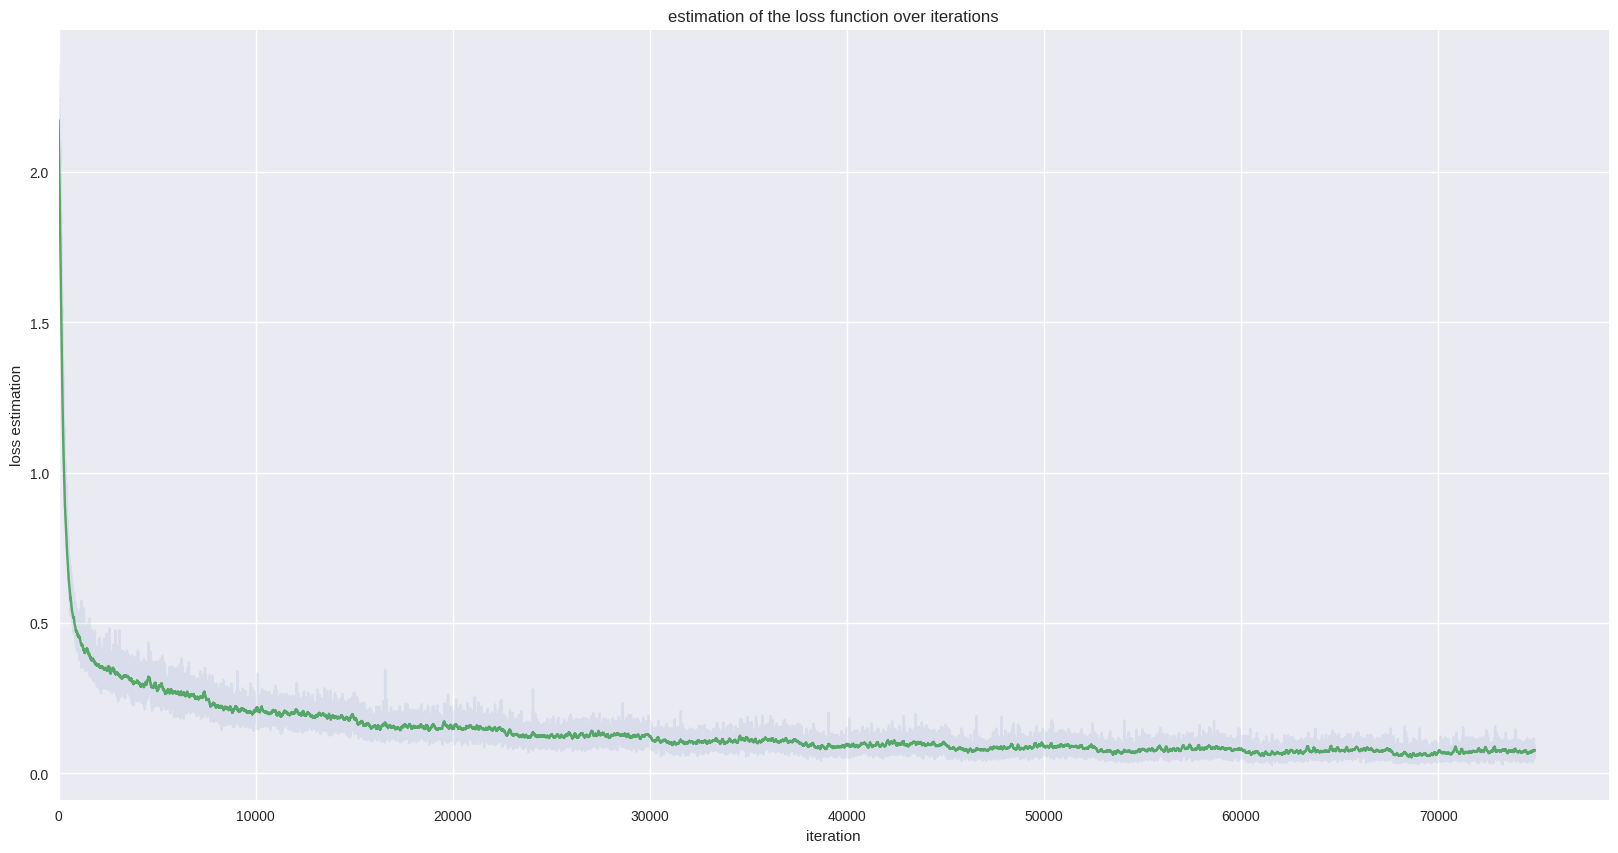

In [28]:
plt.figure(1,figsize=(20,10))
loss_lisse = [np.mean(loss_2[k:k+100]) for k in range (len(loss_)-100)]
plt.plot(np.arange(len(loss_lisse)),loss_[:74900], alpha=0.1)
plt.plot(np.arange(len(loss_lisse)),loss_lisse,label=loss) 
plt.xlim(0, None)
plt.title('estimation of the loss function over iterations')
plt.xlabel('iteration')
plt.ylabel('loss estimation')
plt.show()